## 1. Introduction
    Predicting house prices is a rapidly evolving and challenging task due to various market dynamics. Houston is currently a hot housing market, making it particularly interesting to analyze and predict home prices. I am planning to develop a model that exclusively employs supervised learning techniques to learn from historical data and accurately forecast home prices. This model will leverage insights from past transactions and relevant features to provide reliable predictions for prospective buyers and sellers.

## 2.data selection
  Kaggle is an open-source community that hosts a comprehensive archive of housing prices data. It provides valuable datasets for practitioners and researchers to explore, analyze, and develop predictive models in the field of real estate. I am sourcing my dataset from Kaggle location https://www.kaggle.com/datasets/opashroanld/housing-houston-and-miami 

  *   #### Download data and load it to dataframe

In [39]:
# download the dataset from kaggle
!export KAGGLE_USERNAME='' # add kaggle username
!export KAGGLE_KEY='' # add kaggle key for the user
!curl -L -o housing-prices-dataset.zip\
https://www.kaggle.com/api/v1/datasets/download/opashroanld/housing-houston-and-miami
!unzip housing-prices-dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1003k  100 1003k    0     0  1382k      0 --:--:-- --:--:-- --:--:-- 3087k
Archive:  housing-prices-dataset.zip
  inflating: Houston.csv             
  inflating: Miami.csv               


In [42]:
import pandas as pd
houston_home_prices_df=pd.read_csv('Houston.csv')

* ####  Perform EDA on the houston housing price data
  * check for any nuls missing values
  * Clean the data 

In [58]:
# print the information and head to see the data and types
houston_home_prices_df.info()
print(houston_home_prices_df.head())
print(houston_home_prices_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13546 entries, 0 to 13545
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       13192 non-null  float64
 1   Bedrooms    13192 non-null  float64
 2   Bathrooms   13192 non-null  float64
 3   Car         13192 non-null  float64
 4   sqm_house   13192 non-null  float64
 5   Balcony     13192 non-null  float64
 6   Year_built  13546 non-null  int64  
 7   Address     13546 non-null  object 
 8   Latitude    13546 non-null  float64
 9   Longitude   13546 non-null  float64
 10  Zipcode     13546 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 1.1+ MB
       Price  Bedrooms  Bathrooms  Car  sqm_house  Balcony  Year_built  \
0  1328655.0       9.0        4.0  6.0      470.0      3.0        1977   
1   826553.0       8.0        5.0  5.0      208.0      3.0        2002   
2  1133566.0       2.0        1.0  2.0      564.0      2.0        1982   


In [59]:
# check for nulls and any missing values 
houston_home_prices_df.isnull().sum()

Price         354
Bedrooms      354
Bathrooms     354
Car           354
sqm_house     354
Balcony       354
Year_built      0
Address         0
Latitude        0
Longitude       0
Zipcode         0
dtype: int64

In [71]:
# I want to drop the records for which the home price is null
cleaned_home_prices_df = houston_home_prices_df.dropna(subset=['Price'])


In [72]:
# check for nulls and any missing values 
cleaned_home_prices_df.isnull().sum()

Price           0
Bedrooms      325
Bathrooms     319
Car           314
sqm_house     333
Balcony       314
Year_built      0
Address         0
Latitude        0
Longitude       0
Zipcode         0
dtype: int64

In [83]:
# replace the missing values with a mean for Bedrooms,Bathrooms,Car,sqm_house,Balcony
# fill all floats with mean of total dataset
for column_name in ('Bedrooms','Bathrooms','Car','sqm_house','Balcony'):
    cleaned_home_prices_df[column_name].fillna(cleaned_home_prices_df[column_name].mean(), inplace=True)
cleaned_home_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13192 entries, 0 to 13544
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       13192 non-null  float64
 1   Bedrooms    13192 non-null  float64
 2   Bathrooms   13192 non-null  float64
 3   Car         13192 non-null  float64
 4   sqm_house   13192 non-null  float64
 5   Balcony     13192 non-null  float64
 6   Year_built  13192 non-null  int64  
 7   Address     13192 non-null  object 
 8   Latitude    13192 non-null  float64
 9   Longitude   13192 non-null  float64
 10  Zipcode     13192 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 1.2+ MB


In [84]:
# Now it is time to look at the categorical variable 
cleaned_home_prices_df['Address'].nunique()


13192

In [85]:
# address is unique for each record , so we drop that column
cleaned_home_prices_df.drop('Address', axis=1, inplace=True)

In [86]:
cleaned_home_prices_df.head()

,Price,Bedrooms,Bathrooms,Car,sqm_house,Balcony,Year_built,Latitude,Longitude,Zipcode
0,1328655.0,9.0,4.0,6.0,470.0,3.0,1977,29.799693,-95.396527,77001
1,826553.0,8.0,5.0,5.0,208.0,3.0,2002,29.735212,-95.435717,77001
2,1133566.0,2.0,1.0,2.0,564.0,2.0,1982,29.751218,-95.369976,77001
3,814179.0,8.0,5.0,4.0,216.0,3.0,1986,29.721105,-95.356369,77002
4,1020010.0,7.0,4.0,4.0,347.0,3.0,2003,29.783241,-95.362663,77005


In [89]:
# nw looks at the data 
cleaned_home_prices_df.describe()

,Price,Bedrooms,Bathrooms,Car,sqm_house,Balcony,Year_built,Latitude,Longitude,Zipcode
count,1.319200e+04,13192.000000,13192.000000,13192.000000,13192.000000,13192.000000,13192.000000,13192.000000,13192.000000,13192.000000
mean,8.456761e+05,6.141525,3.441467,3.351685,317.523291,2.338096,1984.921847,29.749687,-95.399910,77002.980898
std,3.681237e+05,2.843307,1.540304,1.660847,171.829185,1.058444,20.447778,0.029004,0.028860,1.408229
min,5.040400e+04,1.000000,1.000000,0.000000,50.000000,0.000000,1950.000000,29.700002,-95.449994,77001.000000
25%,5.924685e+05,4.000000,2.000000,2.000000,191.000000,2.000000,1967.000000,29.724363,-95.425224,77002.000000
50%,8.411120e+05,6.000000,4.000000,3.351685,317.523291,2.000000,1985.000000,29.749352,-95.399677,77003.000000
75%,1.105588e+06,8.000000,4.000000,4.000000,439.000000,3.000000,2003.000000,29.774856,-95.375000,77004.000000
max,1.000000e+07,20.000000,10.000000,10.000000,10000.000000,10.000000,2020.000000,29.799998,-95.350000,77005.000000


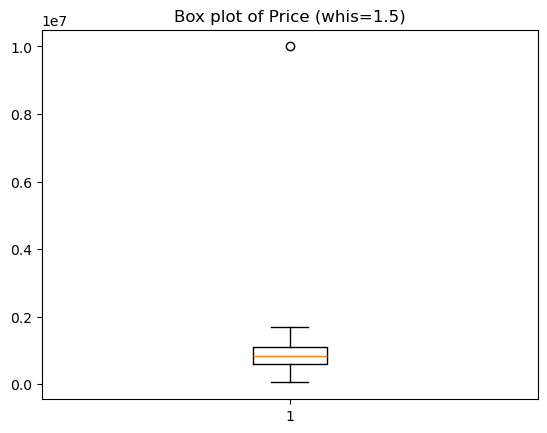

In [171]:
# car and Balcony having zero values , and it can be valid as missing the car , balcony 
# outlier plot sales price
plt.boxplot(cleaned_home_prices_df["Price"],whis=7.0)
plt.title("Box plot of Price (whis=1.5)")
plt.show()

In [178]:
#lets drop the outlier
cleaned_home_prices_df[cleaned_home_prices_df["Price"] >= 10000000].head() 
cleaned_home_prices_df = cleaned_home_prices_df.drop(cleaned_home_prices_df[cleaned_home_prices_df["Price"] >= 10000000].index)
cleaned_home_prices_df.shape

(13191, 10)

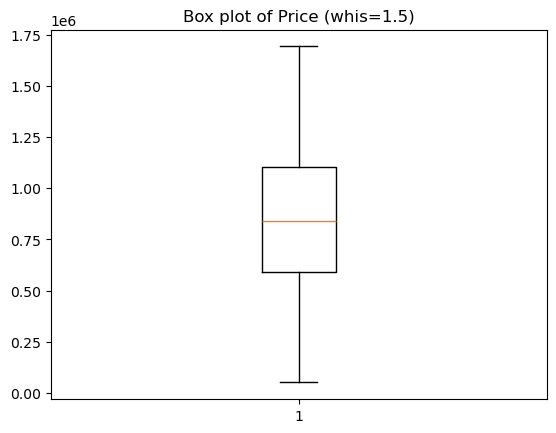

In [179]:
# replot price
plt.boxplot(cleaned_home_prices_df["Price"],whis=7.0)
plt.title("Box plot of Price (whis=1.5)")
plt.show()

## 3 Feature engineering

In [180]:
#Plot correlation matricx and it gives a bit of the relationship to target variable
cleaned_home_prices_df.corr()

,Price,Bedrooms,Bathrooms,Car,sqm_house,Balcony,Year_built,Latitude,Longitude,Zipcode
Price,1.000000,0.442907,0.477931,0.497635,0.680657,0.331115,-0.007928,0.010154,-0.008496,0.006853
Bedrooms,0.442907,1.000000,0.786186,0.749951,0.028609,0.583309,-0.012872,-0.001462,0.003744,0.000914
Bathrooms,0.477931,0.786186,1.000000,0.752172,0.038738,0.567046,-0.009887,-0.004257,-0.007681,-0.000724
Car,0.497635,0.749951,0.752172,1.000000,0.062655,0.535573,-0.020042,0.002049,-0.010045,0.002268
sqm_house,0.680657,0.028609,0.038738,0.062655,1.000000,0.034516,0.002355,0.012234,-0.000624,0.012838
Balcony,0.331115,0.583309,0.567046,0.535573,0.034516,1.000000,-0.009718,0.000519,-0.001518,-0.007249
Year_built,-0.007928,-0.012872,-0.009887,-0.020042,0.002355,-0.009718,1.000000,-0.000610,0.008915,-0.008298
Latitude,0.010154,-0.001462,-0.004257,0.002049,0.012234,0.000519,-0.000610,1.000000,-0.030340,0.013898
Longitude,-0.008496,0.003744,-0.007681,-0.010045,-0.000624,-0.001518,0.008915,-0.030340,1.000000,-0.003981
Zipcode,0.006853,0.000914,-0.000724,0.002268,0.012838,-0.007249,-0.008298,0.013898,-0.003981,1.000000


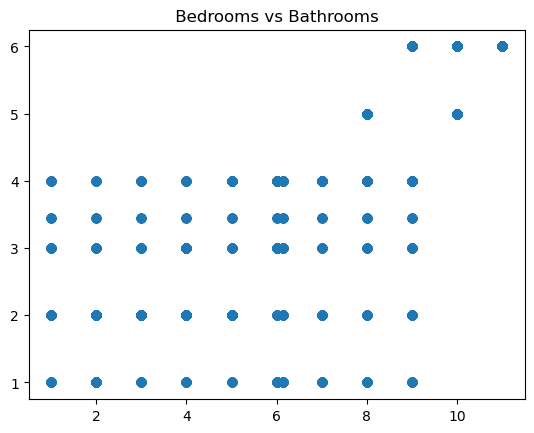

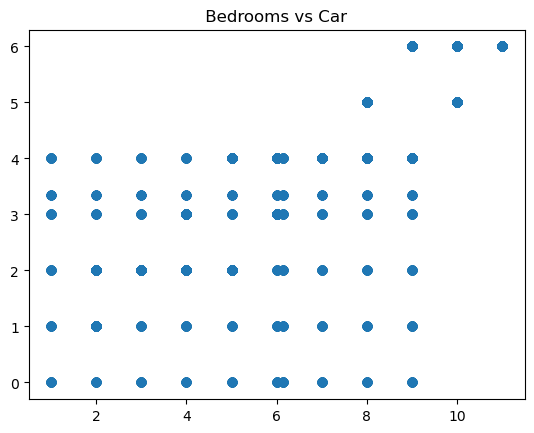

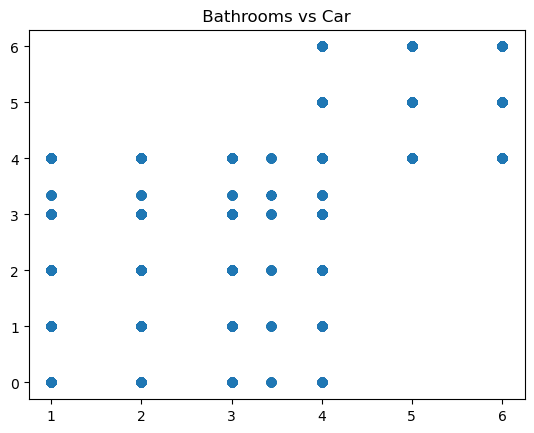

In [181]:
# bedroom bath room and car has hig correlation lets plot them and see
cols=('Bedrooms','Bathrooms','Car')
for idx in range(3):
  for idx1 in range(idx+1,3):
     column_name1 = cols[idx]
     column_name2 = cols[idx1]
     plt.scatter(cleaned_home_prices_df[column_name1], cleaned_home_prices_df[column_name2])
     plt.title(f' {column_name1} vs {column_name2} ')
     plt.show()

Text(0.5, 1.0, 'histogram of price')

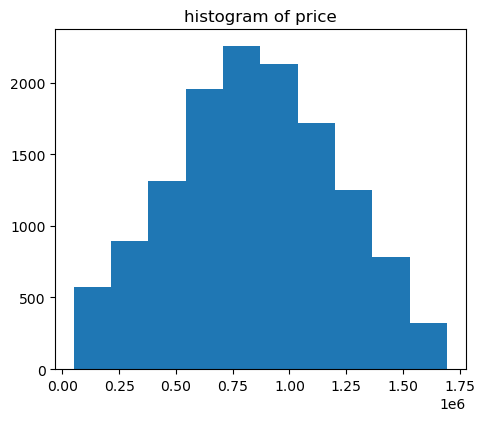

In [182]:
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(cleaned_home_prices_df["Price"])
plt.title("histogram of price")


In [186]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
jb_stats = jarque_bera(cleaned_home_prices_df["Price"])
norm_stats = normaltest(cleaned_home_prices_df["Price"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 203.9582965161614 and p value is 5.1406571765353766e-45
Normality test statistics is 446.1071126471122 and p value is 1.346081389217146e-97


In [187]:
# target is in the normal distribution
# but some features multi collinarity
# select features and target variable and prepare the train and test datasets , selecting 25% for test dataset
# `Y` is the target variable
Y = cleaned_home_prices_df['Price']
# `X` is the feature set 
X = cleaned_home_prices_df.drop(['Price'], axis =1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 465)

In [188]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9893 entries, 1839 to 5721
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bedrooms    9893 non-null   float64
 1   Bathrooms   9893 non-null   float64
 2   Car         9893 non-null   float64
 3   sqm_house   9893 non-null   float64
 4   Balcony     9893 non-null   float64
 5   Year_built  9893 non-null   int64  
 6   Latitude    9893 non-null   float64
 7   Longitude   9893 non-null   float64
 8   Zipcode     9893 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 772.9 KB
<class 'pandas.core.frame.DataFrame'>
Index: 3298 entries, 8510 to 527
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bedrooms    3298 non-null   float64
 1   Bathrooms   3298 non-null   float64
 2   Car         3298 non-null   float64
 3   sqm_house   3298 non-null   float64
 4   Balcony     3298 non-null   float64
 5 

## 4. Working with models,training and tuning

* I will start with linear regession simple model and try to tune parameters and measure the model performance
* I will also try lasso ridge regression techniques and see if the performance improves.

* Next I will try with ensemble model random forest regression to compare the model 

In [191]:
# build regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
# Fit an OLS model using scikit-learn
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# You are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)
def print_scores(X_train,y_train,X_test, y_test,y_preds_train,y_preds_test,regmodel):
 print("R-squared of the model on the training set is: {}".format(regmodel.score(X_train, y_train)))
 print("-----Test set statistics-----")
 print("R-squared of the model on the test set is: {}".format(regmodel.score(X_test, y_test)))
 print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
 print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
 print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
 print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

print_scores(X_train,y_train,X_test, y_test,y_preds_train,y_preds_test,lrm)

R-squared of the model on the training set is: 0.7006204069215953
-----Test set statistics-----
R-squared of the model on the test set is: 0.7019110137168014
Mean absolute error of the prediction is: 119607.36144212353
Mean squared error of the prediction is: 38723766232.9979
Root mean squared error of the prediction is: 196783.5517338731
Mean absolute percentage error of the prediction is: 37.617552755588854


In [192]:
# try lasso 
from sklearn.linear_model import Lasso
# You are making predictions here
for alpha_val in (2,2.5,3,3.5,4,4.5):
  print(f" Lasso with alpha=10**{alpha_val}")
  lassoregr = Lasso(alpha=10**alpha_val)
  lassoregr.fit(X_train, y_train)
  print_scores(X_train,y_train,X_test, y_test,lassoregr.predict(X_train),lassoregr.predict(X_test),lassoregr)

 Lasso with alpha=10**2
R-squared of the model on the training set is: 0.7005871058654168
-----Test set statistics-----
R-squared of the model on the test set is: 0.7019570462515874
Mean absolute error of the prediction is: 119573.38864815405
Mean squared error of the prediction is: 38717786296.81041
Root mean squared error of the prediction is: 196768.3569500198
Mean absolute percentage error of the prediction is: 37.62064736578749
 Lasso with alpha=10**2.5
R-squared of the model on the training set is: 0.7005859282190798
-----Test set statistics-----
R-squared of the model on the test set is: 0.7019647957167977
Mean absolute error of the prediction is: 119547.4332704471
Mean squared error of the prediction is: 38716779589.10552
Root mean squared error of the prediction is: 196765.7988297395
Mean absolute percentage error of the prediction is: 37.62021269596949
 Lasso with alpha=10**3
R-squared of the model on the training set is: 0.7005742627864806
-----Test set statistics-----
R-squ

### model with alpha 10 ** 3 looks better with 
```
R-squared of the model on the training set is: 0.7005742627864806
-----Test set statistics-----
R-squared of the model on the test set is: 0.7019813198527389
Mean absolute error of the prediction is: 119468.23755973132
Mean squared error of the prediction is: 38714632992.596306
Root mean squared error of the prediction is: 196760.34405488396
Mean absolute percentage error of the prediction is: 37.61914153794283```

In [194]:
#ridge
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Here, `alpha` is the regularization
# parameter (usually called `lambda`). As `alpha` gets larger, parameter
# shrinkage grows more pronounced.
for alpha_val in (2,2.5,3,3.5,4,4.5,5):
  print(f" ridgeregr with alpha=10**{alpha_val}")
  ridgeregr = Ridge(alpha=10**alpha_val)
  ridgeregr.fit(X_train, y_train)
  print_scores(X_train,y_train,X_test, y_test,ridgeregr.predict(X_train),ridgeregr.predict(X_test),ridgeregr)


 ridgeregr with alpha=10**2
R-squared of the model on the training set is: 0.700589818699646
-----Test set statistics-----
R-squared of the model on the test set is: 0.7019600305305833
Mean absolute error of the prediction is: 119533.45648642446
Mean squared error of the prediction is: 38717398618.87689
Root mean squared error of the prediction is: 196767.37183506033
Mean absolute percentage error of the prediction is: 37.6228632913537
 ridgeregr with alpha=10**2.5
R-squared of the model on the training set is: 0.7005671405668557
-----Test set statistics-----
R-squared of the model on the test set is: 0.7019620846523049
Mean absolute error of the prediction is: 119423.85663013367
Mean squared error of the prediction is: 38717131774.63565
Root mean squared error of the prediction is: 196766.69376354234
Mean absolute percentage error of the prediction is: 37.62848745238227
 ridgeregr with alpha=10**3
R-squared of the model on the training set is: 0.700395318909978
-----Test set statistic

#### Ridge with alpha 10 ** 3 looks better with 
```
R-squared of the model on the training set is: 0.700395318909978
-----Test set statistics-----
R-squared of the model on the test set is: 0.7018530479864663
Mean absolute error of the prediction is: 119140.77303803118
Mean squared error of the prediction is: 38731296371.628685
Root mean squared error of the prediction is: 196802.68385270736
Mean absolute percentage error of the prediction is: 37.64900986548134```

## Linear regression vs Lasso vs Ridge regressions

  Linear regression model perfomed better with r-square 0.7 , lasso and ridge regressions does not improve much on the model performance. So picking simple regular linear regression model in this comparisions.
  
```
R-squared of the model on the training set is: 0.7006204069215953
-----Test set statistics-----
R-squared of the model on the test set is: 0.7019110137168014
Mean absolute error of the prediction is: 119607.36144212353
Mean squared error of the prediction is: 38723766232.9979
Root mean squared error of the prediction is: 196783.5517338731
Mean absolute percentage error of the prediction is: 37.617552755588854```

### Trying the RandomForestRegressor to predict the house price

In [195]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regression
for n in range(50,200,10):
 print(f'running with {n} estimators')
 rf_model = RandomForestRegressor(n_estimators=n, random_state=200)
 rf_model.fit(X_train, y_train)
 print_scores(X_train,y_train,X_test, y_test,rf_model.predict(X_train),rf_model.predict(X_test),rf_model)

running with 50 estimators
R-squared of the model on the training set is: 0.9739149174309386
-----Test set statistics-----
R-squared of the model on the test set is: 0.8282887963666474
Mean absolute error of the prediction is: 72840.14818071558
Mean squared error of the prediction is: 22306441415.341286
Root mean squared error of the prediction is: 149353.41112723635
Mean absolute percentage error of the prediction is: 26.7786078666107
running with 60 estimators
R-squared of the model on the training set is: 0.9742337335042774
-----Test set statistics-----
R-squared of the model on the test set is: 0.8286911338467831
Mean absolute error of the prediction is: 72661.39474934303
Mean squared error of the prediction is: 22254175067.893135
Root mean squared error of the prediction is: 149178.3331046876
Mean absolute percentage error of the prediction is: 26.774326828146904
running with 70 estimators
R-squared of the model on the training set is: 0.9743457003510178
-----Test set statistics--

#### this model performed lot better than linear regression with r square on training data is at .97 and test data at 0.82
```  
R-squared of the model on the training set is: 0.9754494933922909
-----Test set statistics-----
R-squared of the model on the test set is: 0.829985895259974
Mean absolute error of the prediction is: 72293.91564351355
Mean squared error of the prediction is: 22085976843.20503
Root mean squared error of the prediction is: 148613.51500857863
Mean absolute percentage error of the prediction is: 26.672732357141843

In [198]:
# it is time to tune the model fit with tuning max_depth
for n in range(10,40,5):
 print(f'running with {n} depth')
 rf_model = RandomForestRegressor(
     n_estimators= 120,
     max_features= 9,
     max_depth=n,
     min_samples_split=2,
     min_samples_leaf=1,
     random_state=200)
 rf_model.fit(X_train, y_train)
 print_scores(X_train,y_train,X_test, y_test,rf_model.predict(X_train),rf_model.predict(X_test),rf_model)

running with 10 depth
R-squared of the model on the training set is: 0.9105058449601292
-----Test set statistics-----
R-squared of the model on the test set is: 0.8292293606820811
Mean absolute error of the prediction is: 76936.53668785094
Mean squared error of the prediction is: 22184255778.32031
Root mean squared error of the prediction is: 148943.8007381318
Mean absolute percentage error of the prediction is: 27.449943732717696
running with 15 depth
R-squared of the model on the training set is: 0.9670047651560691
-----Test set statistics-----
R-squared of the model on the test set is: 0.8303302591136732
Mean absolute error of the prediction is: 72698.94924674791
Mean squared error of the prediction is: 22041241660.144386
Root mean squared error of the prediction is: 148462.9302558197
Mean absolute percentage error of the prediction is: 26.725581460848012
running with 20 depth
R-squared of the model on the training set is: 0.9747582718007006
-----Test set statistics-----
R-squared o

#### Random Forest model
  It is interesting that the increase in estimators is improving the performance of the model, but the improvement is not much great from 50 estimators to 190 estimators. To balance we can try to select the estimators with 100. Also to aviod overfit of the model, above we worked on tuning the max depth. the model is optimum at max depth 15.
  ```
R-squared of the model on the training set is: 0.9670047651560691
-----Test set statistics-----
R-squared of the model on the test set is: 0.8303302591136732
Mean absolute error of the prediction is: 72698.94924674791
Mean squared error of the prediction is: 22041241660.144386
Root mean squared error of the prediction is: 148462.9302558197
Mean absolute percentage error of the prediction is: 26.725581460848012

## Summary 

   I tried multiple regression models, started with simple linear regression and the model MAE, MSE are 119607, 38723766232 which are high and , R² is at .70. Overall its performance is just ok at .70 R² on test and train datasets, later tried to add lasso and ridge regression. There is no significant improvement in them compared to linear regression. 

   Later I tried with enseble model of random forest regressor, this model taking time to run compared to linear regression, but the performance of the model is drastically improved and it is in acceptable ranges with MAE, MSE are at 72698  and 22041241660 and the training set is 0.967 and test set is 0.830. This model perfromance looks better overall.
   #### From above analysis I will select the random forest regressor model with 100 estimators and depth 15 to accurately predict the houseprice